# <center>ML 2 Group B Assigment - Python File</center>

### I. Data Revision

In the first place it is necessary to upload both sets of information and understand the diverse variables that are present and what is intended to be found.

In [166]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:70% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 12px; }</style>")) # Increase font size

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas as pd
import numpy as np
import sklearn 

In [167]:
training_set=pd.read_csv('ml_training_set.csv')
test_set=pd.read_csv('ml_test_set.csv')

In [168]:
#Review the columns and rows of both sets

print('Training_set =',training_set.shape)
print('Test_set =',test_set.shape)

Training_set = (1340, 21)
Test_set = (660, 20)


In [169]:
#Hence it is observed that the test set lacks one column, let's see which one it is

training_set.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,999,0,2.9,1,11,1,64,0.2,199,4,...,1397,1616,2593,14,11,16,1,1,0,2
1,1265,0,0.6,1,4,1,49,0.5,90,1,...,275,687,1518,16,11,8,1,0,1,1
2,1000,1,0.5,0,12,0,63,0.7,179,8,...,1537,1761,3744,11,1,7,0,0,1,3
3,1874,1,2.7,1,10,0,8,0.9,166,7,...,964,1233,1246,8,1,2,0,0,1,1
4,1658,1,1.4,1,0,1,38,0.3,159,5,...,51,739,2609,12,11,19,1,0,0,2
5,673,1,1.9,0,13,1,35,0.4,142,6,...,1096,1570,3541,18,17,4,1,0,1,3
6,1127,1,2.9,1,5,1,57,0.8,163,1,...,928,1049,2048,11,5,17,1,1,1,1
7,614,1,0.7,0,4,1,51,0.1,178,7,...,1012,1040,2854,10,7,12,1,0,1,2
8,972,1,0.5,1,5,0,13,0.4,193,5,...,1392,1795,1615,11,6,13,0,1,0,1
9,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3


In [170]:
test_set.head(10)  

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1646,0,2.5,0,3,1,25,0.6,200,2,5,211,1608,686,8,6,11,1,1,0
1,1182,0,0.5,0,7,1,8,0.5,138,8,16,275,986,2563,19,17,19,1,0,0
2,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0
3,989,1,2.0,0,4,0,17,0.2,166,3,19,256,1394,3892,18,7,19,1,1,0
4,615,1,0.5,1,7,0,58,0.5,130,5,8,1021,1958,1906,14,5,5,1,0,0
5,627,1,1.6,1,3,1,12,0.2,131,7,17,447,819,2476,17,1,10,1,0,0
6,894,0,0.9,0,5,1,54,0.2,130,3,15,104,541,2829,11,5,13,1,0,1
7,1066,0,3.0,1,6,1,5,0.5,167,5,7,53,1504,1044,8,7,11,1,0,0
8,616,0,1.9,1,13,1,44,0.8,81,3,17,651,1618,3366,18,8,13,1,1,0
9,712,0,0.5,0,6,0,27,0.5,86,2,11,1245,1309,2001,11,10,12,1,1,1


Hence it is observable that the column missing is price_range, which is the column that need to be predicted in the test_set. Also we can see that the values within the data sets do not possess the same size, so it would be necessary to do certain transformations. We will see that in the following part.

In [171]:
# Let's review the type of data in the training_set, which is the one that is going to be used.

training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1340 non-null   int64  
 1   blue           1340 non-null   int64  
 2   clock_speed    1340 non-null   float64
 3   dual_sim       1340 non-null   int64  
 4   fc             1340 non-null   int64  
 5   four_g         1340 non-null   int64  
 6   int_memory     1340 non-null   int64  
 7   m_dep          1340 non-null   float64
 8   mobile_wt      1340 non-null   int64  
 9   n_cores        1340 non-null   int64  
 10  pc             1340 non-null   int64  
 11  px_height      1340 non-null   int64  
 12  px_width       1340 non-null   int64  
 13  ram            1340 non-null   int64  
 14  sc_h           1340 non-null   int64  
 15  sc_w           1340 non-null   int64  
 16  talk_time      1340 non-null   int64  
 17  three_g        1340 non-null   int64  
 18  touch_sc

In [172]:
# Now it is time to see if there are null values that can affect the preliminary analysis

training_set.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

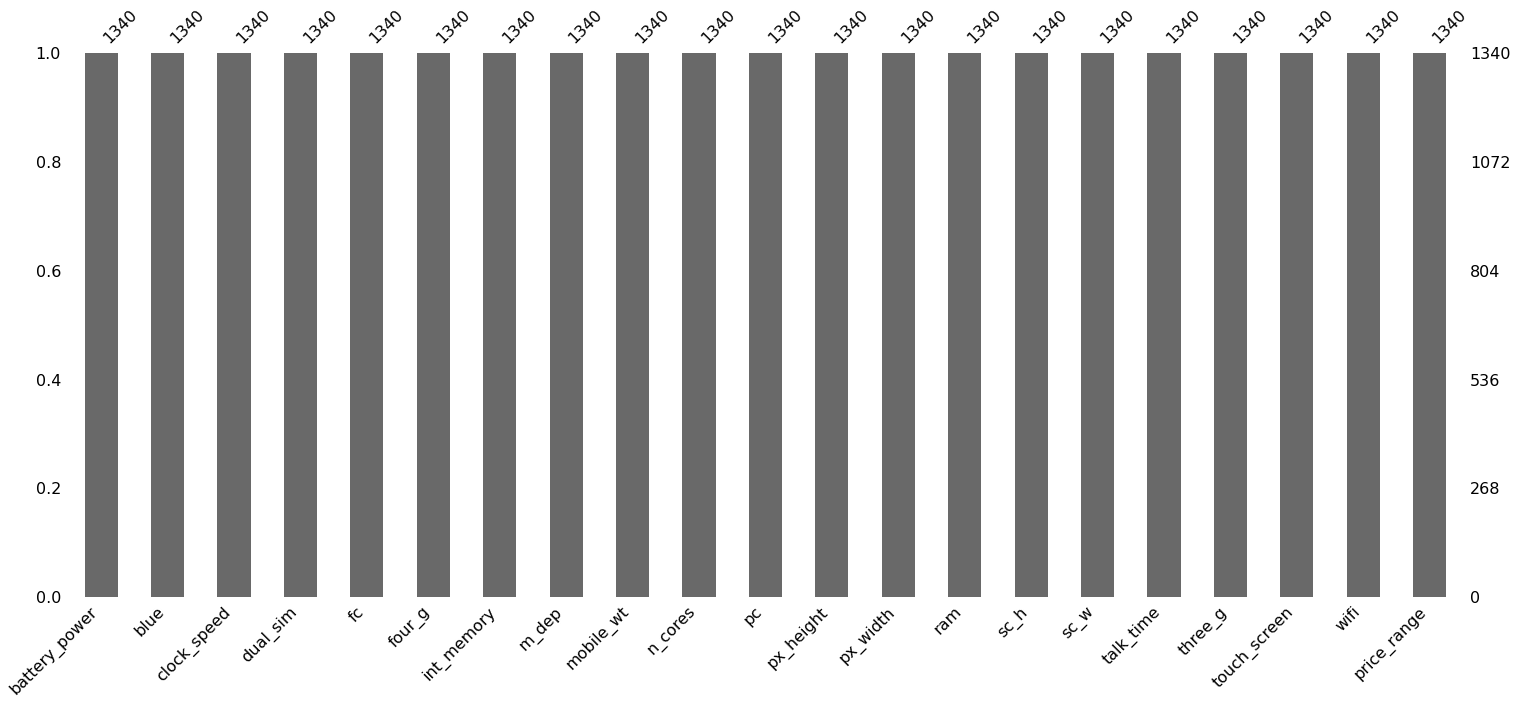

In [173]:
import missingno as msno

import matplotlib.pyplot as plt

msno.bar(training_set)
plt.show()

So as it can be visible, all the columns are complete and do not present missing data. Also, they present similar types of data; hence, the data set can be analysed.

### II. Data Analysis and Transformation

#### Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

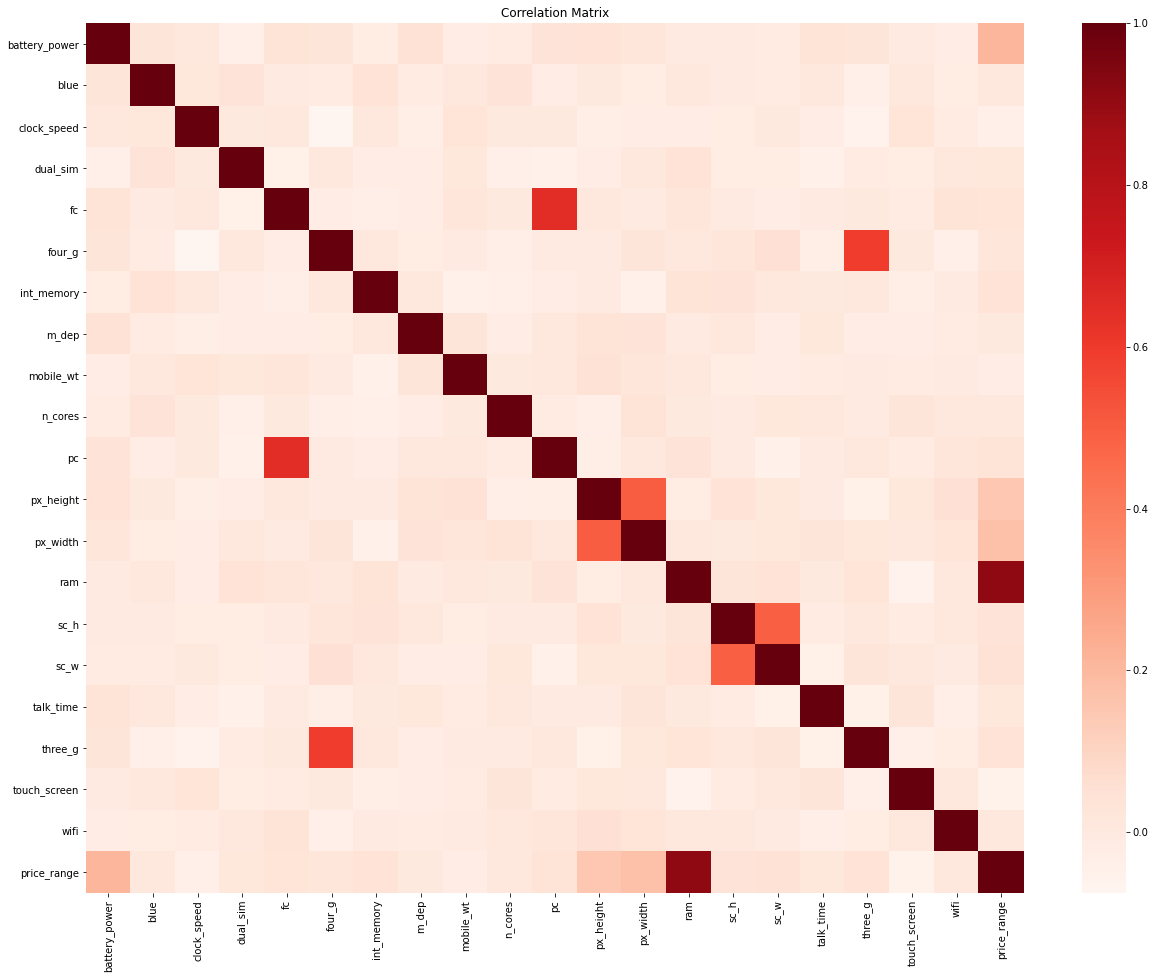

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_analysis=training_set.corr()
fig = plt.figure(figsize=(21,16))
r = sns.heatmap(corr_analysis, cmap='Reds')
r.set_title("Correlation Matrix")

So here it is appreciable that not all the presented variables are important to predict the price_range. Now let's order them to have a better understanding of their impact.

In [175]:
corr_analysis.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.915584
battery_power    0.213641
px_width         0.172941
px_height        0.151711
sc_w             0.048215
int_memory       0.044948
three_g          0.043548
pc               0.041643
sc_h             0.034198
fc               0.033815
four_g           0.022698
talk_time        0.020428
dual_sim         0.019353
blue             0.012093
n_cores          0.009519
wifi             0.005374
m_dep            0.004608
mobile_wt       -0.018811
clock_speed     -0.036722
touch_screen    -0.050248
Name: price_range, dtype: float64

#### Visualization Analysis

Now considering this, let's visualize the 5 top variables with price_range

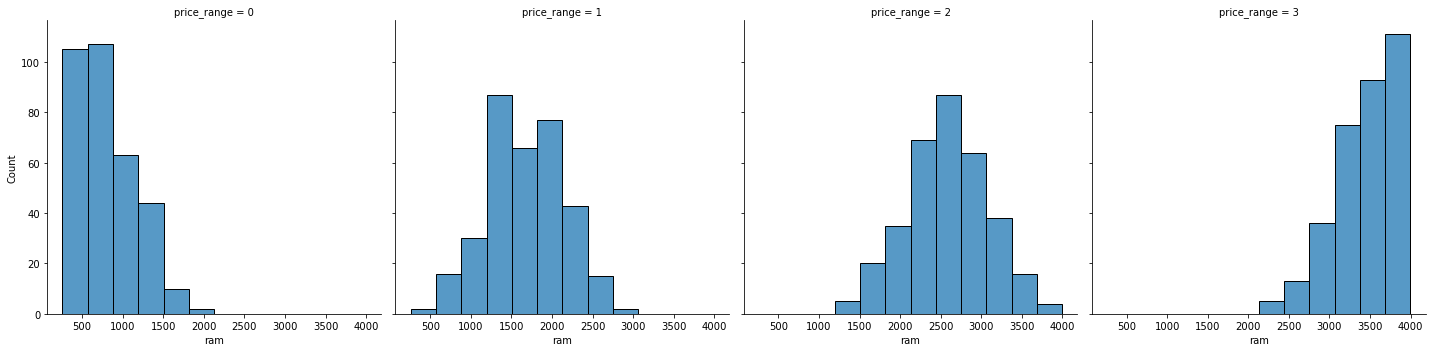

In [176]:
sns.displot(training_set, x="ram", col="price_range")

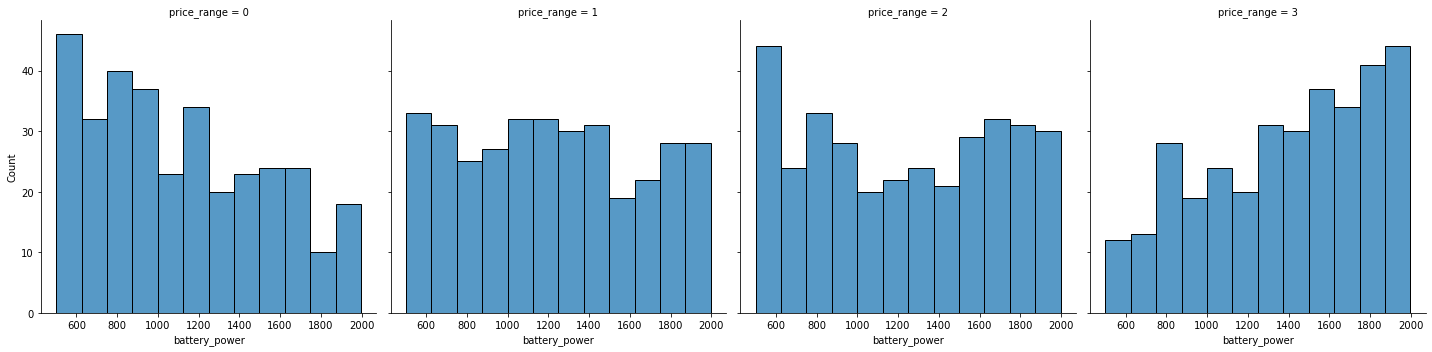

In [177]:
sns.displot(training_set, x="battery_power", col="price_range")

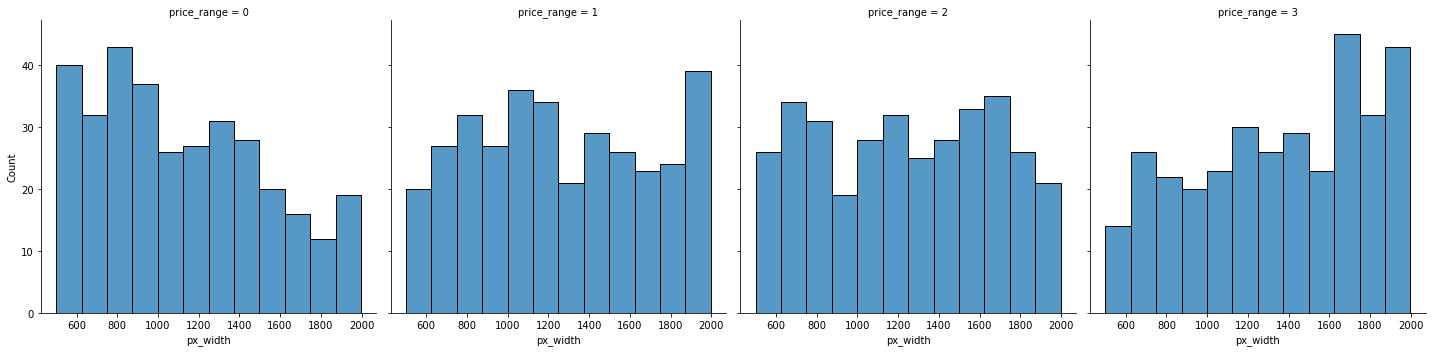

In [178]:
sns.displot(training_set, x="px_width", col="price_range")

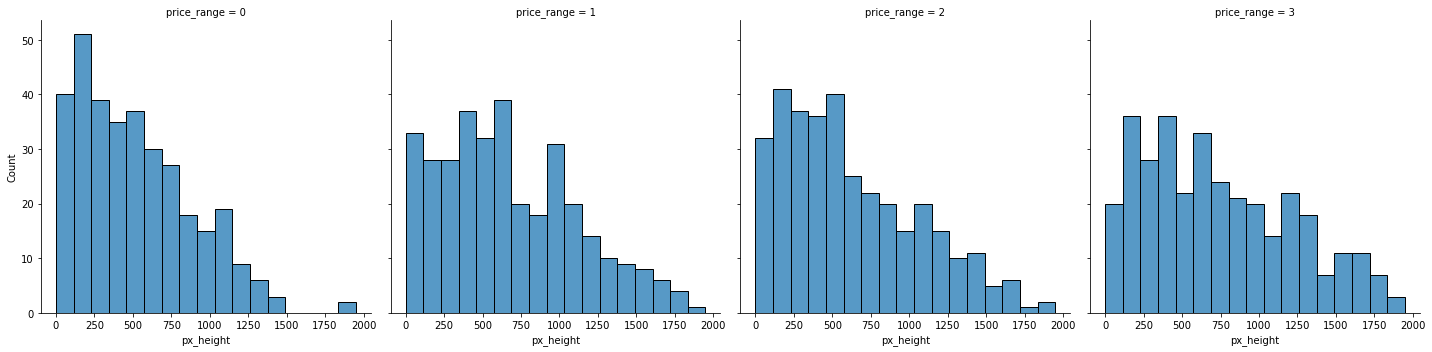

In [179]:
sns.displot(training_set, x="px_height", col="price_range")

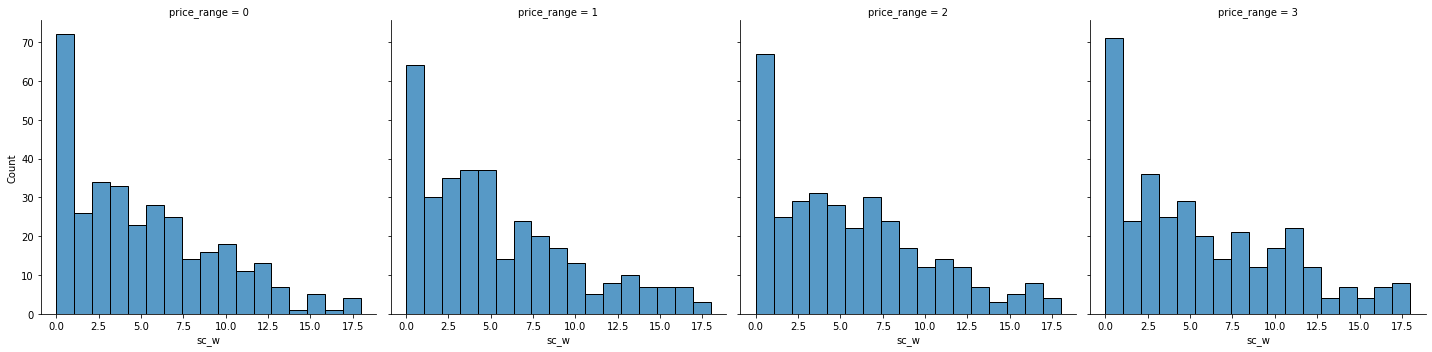

In [180]:
sns.displot(training_set, x="sc_w", col="price_range")

So with this it can be stated that there is a strong relationship between the variable price_range and ram. Also, battery_power and px_width have a considerable impact in the target variable.

#### Selecting Columns

In [181]:
training_set

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,999,0,2.9,1,11,1,64,0.2,199,4,...,1397,1616,2593,14,11,16,1,1,0,2
1,1265,0,0.6,1,4,1,49,0.5,90,1,...,275,687,1518,16,11,8,1,0,1,1
2,1000,1,0.5,0,12,0,63,0.7,179,8,...,1537,1761,3744,11,1,7,0,0,1,3
3,1874,1,2.7,1,10,0,8,0.9,166,7,...,964,1233,1246,8,1,2,0,0,1,1
4,1658,1,1.4,1,0,1,38,0.3,159,5,...,51,739,2609,12,11,19,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1975,1,1.9,1,2,0,31,0.9,151,1,...,775,1607,3022,13,5,19,0,0,1,3
1336,589,1,0.5,0,1,1,59,0.7,146,8,...,759,1858,362,16,10,6,1,1,1,0
1337,1829,1,0.5,0,0,1,15,0.4,160,5,...,729,1267,2080,16,11,12,1,0,1,2
1338,1927,0,0.9,1,3,0,11,0.4,190,8,...,491,1506,2916,16,11,18,0,1,1,3


#### Outliers

Now let's see if there are any outliers.

In [182]:
def remove_outlier(training_set_in, col_name):
    q1 = training_set_in[col_name].quantile(0.25)
    q3 = training_set_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    training_set_out = training_set_in.loc[(training_set_in[col_name] > fence_low) & (training_set_in[col_name] < fence_high)]
    print("{} outliers removed".format(len(training_set_in)-len(training_set_out)))
    return training_set_out

Analyzing outliers of column: battery_power


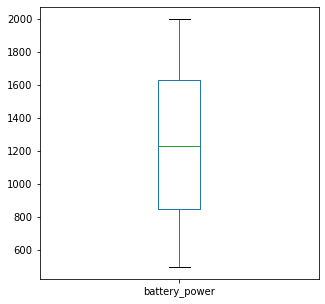

Analyzing outliers of column: blue


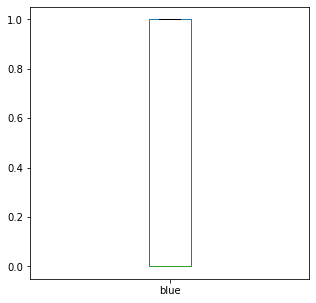

Analyzing outliers of column: clock_speed


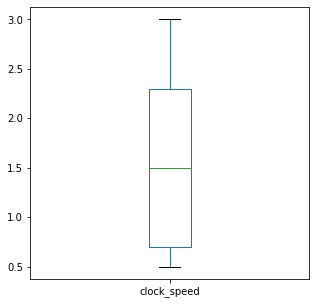

Analyzing outliers of column: dual_sim


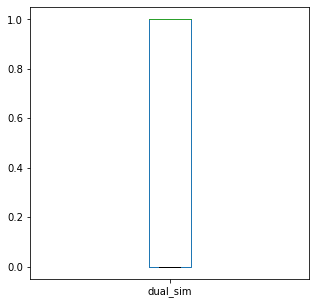

Analyzing outliers of column: fc


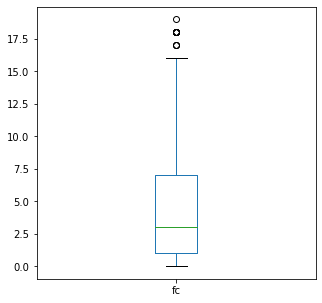

Analyzing outliers of column: four_g


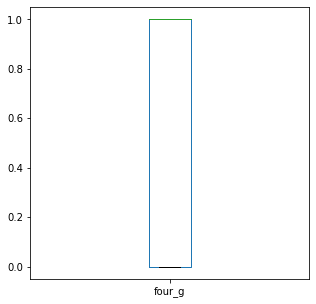

Analyzing outliers of column: int_memory


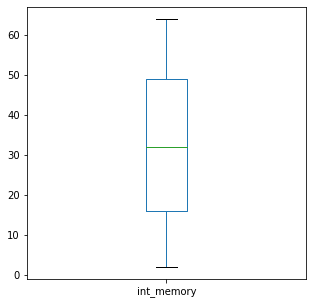

Analyzing outliers of column: m_dep


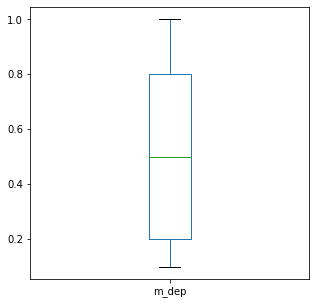

Analyzing outliers of column: mobile_wt


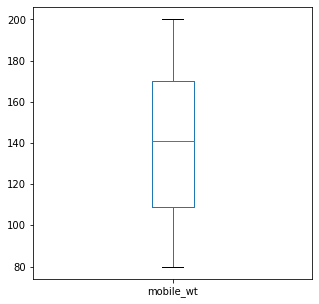

Analyzing outliers of column: n_cores


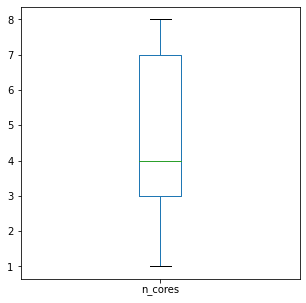

Analyzing outliers of column: pc


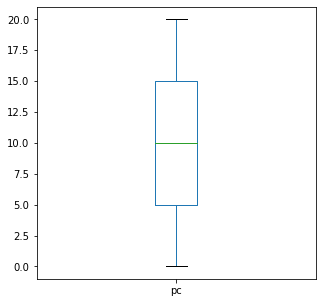

Analyzing outliers of column: px_height


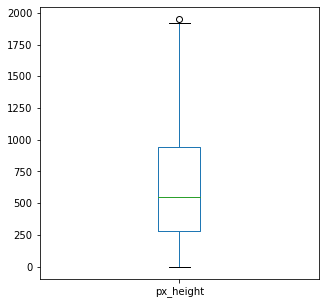

Analyzing outliers of column: px_width


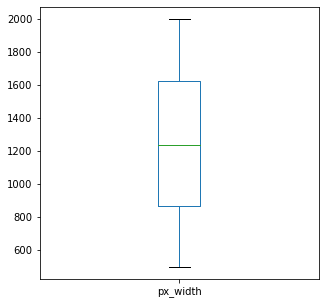

Analyzing outliers of column: ram


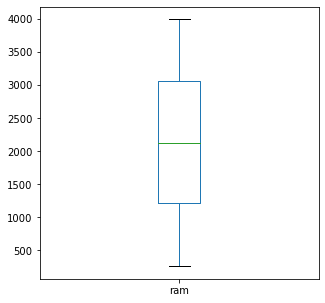

Analyzing outliers of column: sc_h


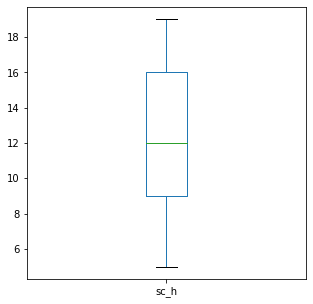

Analyzing outliers of column: sc_w


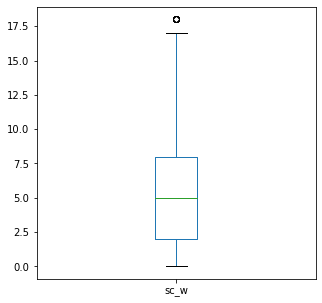

Analyzing outliers of column: talk_time


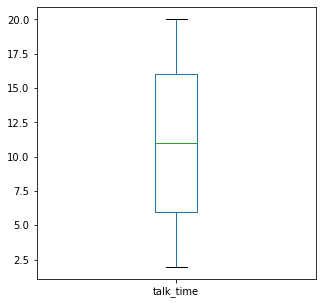

Analyzing outliers of column: three_g


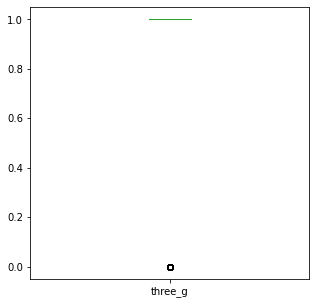

Analyzing outliers of column: touch_screen


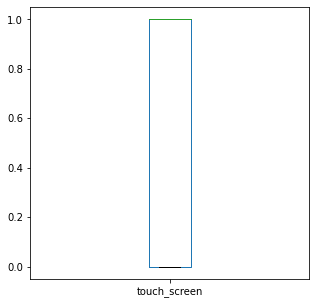

Analyzing outliers of column: wifi


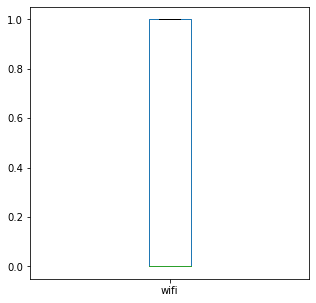

Analyzing outliers of column: price_range


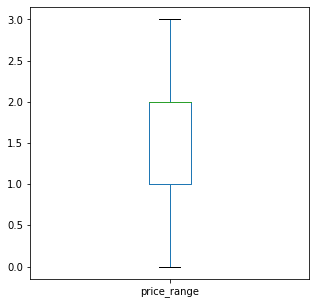

In [183]:
for (columnName, _) in training_set.iteritems():
   if (training_set[columnName].dtype in ['float64','int64']): 
    print("Analyzing outliers of column: {}".format(columnName))
    plt.figure(figsize=(5,5))
    training_set.boxplot([columnName], grid=False, fontsize=10)
    plt.show() 

In [184]:
remove_outlier(training_set,'fc')
remove_outlier(training_set,'px_height')
remove_outlier(training_set,'sc_w')

29 outliers removed
1 outliers removed
19 outliers removed


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,999,0,2.9,1,11,1,64,0.2,199,4,...,1397,1616,2593,14,11,16,1,1,0,2
1,1265,0,0.6,1,4,1,49,0.5,90,1,...,275,687,1518,16,11,8,1,0,1,1
2,1000,1,0.5,0,12,0,63,0.7,179,8,...,1537,1761,3744,11,1,7,0,0,1,3
3,1874,1,2.7,1,10,0,8,0.9,166,7,...,964,1233,1246,8,1,2,0,0,1,1
4,1658,1,1.4,1,0,1,38,0.3,159,5,...,51,739,2609,12,11,19,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1975,1,1.9,1,2,0,31,0.9,151,1,...,775,1607,3022,13,5,19,0,0,1,3
1336,589,1,0.5,0,1,1,59,0.7,146,8,...,759,1858,362,16,10,6,1,1,1,0
1337,1829,1,0.5,0,0,1,15,0.4,160,5,...,729,1267,2080,16,11,12,1,0,1,2
1338,1927,0,0.9,1,3,0,11,0.4,190,8,...,491,1506,2916,16,11,18,0,1,1,3


After removing the outliers our data set contains only 1321 rows. 

#### Standardization and Normalization

As values within the worked dataset still present considerable size differences, they need to be standardized for obtaining the best comparable results.

In [185]:
from sklearn.preprocessing import StandardScaler

X = training_set.iloc[:,:20].values
training_set.iloc[:,:20] = StandardScaler().fit_transform(X) 


training_set.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.547855,-0.983715,1.663242,0.953327,1.561955,0.943391,1.727073,-1.067229,1.669421,-0.243341,...,1.716917,0.857252,0.429293,0.429921,1.234901,0.914257,0.560112,0.997019,-0.992565,2
1,0.051190,-0.983715,-1.129823,0.953327,-0.056955,0.943391,0.910231,-0.024385,-1.417145,-1.542453,...,-0.821703,-1.289582,-0.565343,0.902710,1.234901,-0.546374,0.560112,-1.002990,1.007491,1
2,-0.545603,1.016555,-1.251260,-1.048958,1.793228,-1.060006,1.672617,0.670845,1.103079,1.488808,...,2.033679,1.192334,1.494248,-0.279263,-1.059881,-0.728953,-1.785357,-1.002990,1.007491,3
3,1.422688,1.016555,1.420367,0.953327,1.330682,-1.060006,-1.322472,1.366074,0.734956,1.055770,...,0.737218,-0.027826,-0.817009,-0.988447,-1.059881,-1.641848,-1.785357,-1.002990,1.007491,1
4,0.936246,1.016555,-0.158322,0.953327,-0.982047,0.943391,0.311213,-0.719615,0.536736,0.189696,...,-1.328522,-1.169415,0.444097,-0.042869,1.234901,1.461994,0.560112,-1.002990,-0.992565,2
5,-1.282022,1.016555,0.448866,-1.048958,2.024501,0.943391,0.147844,-0.372000,0.055345,0.622733,...,1.035879,0.750950,1.306423,1.375499,2.611771,-1.276690,0.560112,-1.002990,1.007491,3
6,-0.259592,1.016555,1.663242,0.953327,0.174318,0.943391,1.345880,1.018459,0.650005,-1.542453,...,0.655765,-0.453033,-0.074964,-0.279263,-0.141968,1.096836,0.560112,0.997019,1.007491,1
7,-1.414893,1.016555,-1.008385,-1.048958,-0.056955,0.943391,1.019143,-1.414844,1.074761,1.055770,...,0.845822,-0.473831,0.670782,-0.515658,0.316988,0.183941,0.560112,-1.002990,1.007491,2
8,-0.608660,1.016555,-1.251260,0.953327,0.174318,-1.060006,-1.050191,-0.372000,1.499518,0.189696,...,1.705604,1.270905,-0.475594,-0.279263,0.087510,0.366520,-1.785357,0.997019,-0.992565,1
9,1.303330,-0.983715,0.205991,-1.048958,-0.056955,0.943391,-1.213560,1.018459,-0.029606,1.488808,...,-0.581869,-0.524671,1.009421,0.193526,0.546466,1.279415,0.560112,-1.002990,1.007491,3


#### Dimensionality Reduction

PCA is used to reduce the effect of dimensionality and reduce overfitting. PCA only works with scale variable, so we will create a df for the numerical variable and another df for the categorical variables, apply PCA on the numerical df, and merge the components with the categorical df

In [186]:
num_train_set = pd.DataFrame()
num_train_set['battery_power'] = training_set['battery_power']
num_train_set['clock_speed'] = training_set['clock_speed']
num_train_set['fc'] = training_set['fc']
num_train_set['int_memory'] = training_set['int_memory']
num_train_set['m_dep'] = training_set['m_dep']
num_train_set['mobile_wt'] = training_set['mobile_wt']
num_train_set['n_cores'] = training_set['n_cores']
num_train_set['pc'] = training_set['pc']
num_train_set['px_height'] = training_set['px_height']
num_train_set['px_width'] = training_set['px_width']
num_train_set['ram'] = training_set['ram']
num_train_set['sc_h'] = training_set['sc_h']
num_train_set['sc_w'] = training_set['sc_w']
num_train_set['talk_time'] = training_set['talk_time']

In [187]:
cat_train_set = pd.DataFrame()       
cat_train_set['blue'] = training_set['blue']
cat_train_set['dual_sim'] = training_set['dual_sim']
cat_train_set['four_g'] = training_set['four_g']
cat_train_set['three_g'] = training_set['three_g']
cat_train_set['touch_screen'] = training_set['touch_screen']
cat_train_set['wifi'] = training_set['wifi']
cat_train_set['price_range'] = training_set['price_range']

In [188]:
from sklearn.decomposition import PCA

pca_training_set = PCA()

principalComponents_training = pca_training_set.fit_transform(num_train_set)

pd.DataFrame(principalComponents_training).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03
mean,-1.193075e-17,1.797898e-17,-1.491344e-17,4.171622e-17,-2.154164e-17,3.446663e-17,4.770231e-17,4.896581e-17,3.347240e-17,2.402721e-17,3.220113e-17,3.744931e-17,-1.899393e-17,7.373869e-18
std,1.291802e+00,1.243505e+00,1.215901e+00,1.041300e+00,1.022694e+00,1.017993e+00,1.006487e+00,9.988732e-01,9.794376e-01,9.737766e-01,9.426945e-01,7.168057e-01,6.946223e-01,5.892193e-01
min,-2.477537e+00,-2.781752e+00,-3.439536e+00,-3.006830e+00,-2.759140e+00,-2.961906e+00,-3.211866e+00,-2.933479e+00,-2.844416e+00,-2.876132e+00,-2.836217e+00,-1.859543e+00,-1.465826e+00,-1.245366e+00
25%,-1.045201e+00,-8.690856e-01,-8.587050e-01,-7.490426e-01,-7.114086e-01,-7.290401e-01,-6.914452e-01,-7.028760e-01,-6.779433e-01,-6.761631e-01,-6.554790e-01,-4.930678e-01,-5.434015e-01,-4.098129e-01
50%,-1.254692e-01,-1.421282e-01,1.564609e-02,-1.389047e-03,-3.163764e-03,-9.758268e-03,-2.285827e-03,-3.631128e-02,-9.530239e-04,1.399244e-02,6.378844e-03,-4.886146e-02,-7.518575e-02,-1.335544e-01
75%,8.775707e-01,8.415287e-01,8.912677e-01,7.228525e-01,7.212167e-01,6.930929e-01,7.049233e-01,7.282900e-01,6.882933e-01,6.615523e-01,6.451819e-01,4.673474e-01,4.624053e-01,3.784347e-01
max,3.699765e+00,3.961060e+00,3.558823e+00,3.609444e+00,2.936473e+00,3.274330e+00,3.353365e+00,3.107020e+00,3.048168e+00,3.255318e+00,3.022912e+00,2.455576e+00,2.301263e+00,2.035158e+00


In [189]:
pc_set = pd.DataFrame(principalComponents_training, columns=num_train_set.columns)

In [190]:
pc_set.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03
mean,-1.193075e-17,1.797898e-17,-1.491344e-17,4.171622e-17,-2.154164e-17,3.446663e-17,4.770231e-17,4.896581e-17,3.347240e-17,2.402721e-17,3.220113e-17,3.744931e-17,-1.899393e-17,7.373869e-18
std,1.291802e+00,1.243505e+00,1.215901e+00,1.041300e+00,1.022694e+00,1.017993e+00,1.006487e+00,9.988732e-01,9.794376e-01,9.737766e-01,9.426945e-01,7.168057e-01,6.946223e-01,5.892193e-01
min,-2.477537e+00,-2.781752e+00,-3.439536e+00,-3.006830e+00,-2.759140e+00,-2.961906e+00,-3.211866e+00,-2.933479e+00,-2.844416e+00,-2.876132e+00,-2.836217e+00,-1.859543e+00,-1.465826e+00,-1.245366e+00
25%,-1.045201e+00,-8.690856e-01,-8.587050e-01,-7.490426e-01,-7.114086e-01,-7.290401e-01,-6.914452e-01,-7.028760e-01,-6.779433e-01,-6.761631e-01,-6.554790e-01,-4.930678e-01,-5.434015e-01,-4.098129e-01
50%,-1.254692e-01,-1.421282e-01,1.564609e-02,-1.389047e-03,-3.163764e-03,-9.758268e-03,-2.285827e-03,-3.631128e-02,-9.530239e-04,1.399244e-02,6.378844e-03,-4.886146e-02,-7.518575e-02,-1.335544e-01
75%,8.775707e-01,8.415287e-01,8.912677e-01,7.228525e-01,7.212167e-01,6.930929e-01,7.049233e-01,7.282900e-01,6.882933e-01,6.615523e-01,6.451819e-01,4.673474e-01,4.624053e-01,3.784347e-01
max,3.699765e+00,3.961060e+00,3.558823e+00,3.609444e+00,2.936473e+00,3.274330e+00,3.353365e+00,3.107020e+00,3.048168e+00,3.255318e+00,3.022912e+00,2.455576e+00,2.301263e+00,2.035158e+00


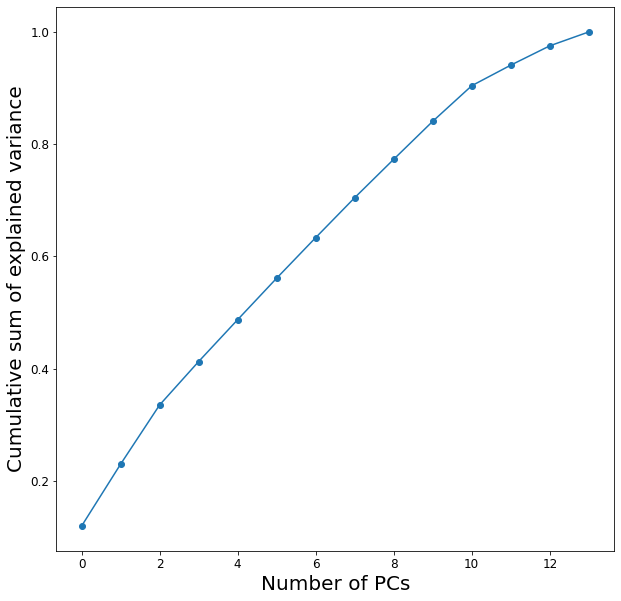

In [191]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(np.cumsum(pca_training_set.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs', fontsize=20)
plt.ylabel('Cumulative sum of explained variance' , fontsize=20);

In [192]:
training_pca = pd.concat([pc_set.iloc[:, 0:18], cat_train_set], axis=1)
training_pca.columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14",'blue', 'dial_sim', 'four_g', 'three_g', 'touch_screen', 'wifi','price_range']
training_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,blue,dial_sim,four_g,three_g,touch_screen,wifi,price_range
0,1.680771,2.317577,-0.469076,0.759930,1.691759,0.465629,0.094239,2.022775,-1.786920,-0.677437,...,-0.265015,-0.815694,0.184592,-0.983715,0.953327,0.943391,0.560112,0.997019,-0.992565,2
1,-1.012625,-0.572491,-2.087518,-1.443913,0.747832,0.050662,-0.994304,-1.584879,0.045888,0.277864,...,-0.198520,-0.340612,-0.511645,-0.983715,0.953327,0.943391,0.560112,-1.002990,1.007491,1
2,2.152388,1.906686,1.391253,-0.144692,1.396100,-1.160906,2.064919,0.279083,1.078472,-1.408041,...,0.784412,-0.342102,-0.266858,1.016555,-1.048958,-1.060006,-1.785357,-1.002990,1.007491,3
3,1.731848,0.038639,1.536266,1.316902,-1.066011,1.884287,-0.399016,0.289396,2.137161,-0.255639,...,0.453349,-0.502632,-0.469579,1.016555,0.953327,-1.060006,-1.785357,-1.002990,1.007491,1
4,-1.791260,-1.177846,-1.231219,-0.727190,-1.061724,-0.067382,0.443431,1.221807,-0.812589,0.767799,...,-0.790345,-0.479302,-0.374175,1.016555,0.953327,0.943391,0.560112,-1.002990,-0.992565,2


So considering the cumulative curve, it can be assumed that 18 PCs are a good fit for the models.

### III. Modelling

Now that the data is transformed, training models and adjustments can be applied in order to get the best predictor.

In [193]:
from sklearn.model_selection import train_test_split

X = training_pca.loc[:, training_pca.columns != 'price_range']
y = training_pca['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)

### SVM

In [194]:
from sklearn import svm
from sklearn.svm import SVC

In [195]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [196]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9365671641791045


The SVM was used as it is a good classification model that can attain good performance and is well used for value determination. In this case as the price range is trying to be predicted, it looked like a good option, which is sustained with an accuracy of 0.940.

### Adding GridSearchCV

In this case we add GriSearchCV for helping the model to have a better fit and cross validation.

In [197]:
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,blue,dial_sim,four_g,three_g,touch_screen,wifi
782,-0.421212,-1.932650,-0.183547,-0.171419,1.041105,-1.187576,1.757159,0.517541,0.451219,-0.998019,-0.739671,-0.779135,-0.599258,-0.494543,1.016555,0.953327,-1.060006,0.560112,0.997019,-0.992565
414,2.013573,0.441249,-0.990892,-1.609959,0.247512,0.582449,-1.048095,0.857494,0.396404,0.306249,0.184553,0.163905,-0.230603,0.272339,-0.983715,0.953327,0.943391,0.560112,-1.002990,-0.992565
997,0.667732,-1.137896,0.372817,0.277883,-0.545271,1.598962,-0.819671,1.366013,-1.463111,2.179492,-0.409914,-0.684417,0.050264,0.627533,-0.983715,-1.048958,0.943391,0.560112,0.997019,1.007491
907,1.356232,0.370243,-0.448851,-0.515329,1.443319,0.510852,0.836297,-0.610622,-1.763208,-0.495739,0.287663,0.929311,-0.277927,0.368617,-0.983715,-1.048958,-1.060006,0.560112,0.997019,-0.992565
329,-1.191799,0.046537,-0.399353,-0.882012,-0.270560,0.889846,0.986388,0.357137,-0.180207,0.133853,-1.672504,-0.725451,0.104345,-0.459343,1.016555,0.953327,-1.060006,0.560112,-1.002990,1.007491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,-1.347200,-0.167302,1.682887,-0.336312,1.282545,-1.950177,-0.362999,1.531384,-0.469307,0.604076,0.705261,0.735459,-0.227182,-0.188057,-0.983715,-1.048958,-1.060006,-1.785357,-1.002990,-0.992565
1147,-1.360927,-0.934576,0.913656,0.228106,0.457525,-0.519027,1.595843,-0.646542,0.461981,1.346725,-0.380899,0.092369,-0.996721,-0.181751,-0.983715,0.953327,0.943391,0.560112,-1.002990,-0.992565
527,0.155315,2.626194,1.568210,-0.591203,0.750003,-0.332318,0.675195,2.492064,1.366301,-0.373638,-0.984661,-0.299655,-1.237364,-0.430261,1.016555,-1.048958,0.943391,0.560112,0.997019,-0.992565
1149,-1.328424,-0.361247,-0.590406,0.374098,2.054060,-0.318410,-1.460159,-0.601058,-0.333626,0.587378,1.069288,0.355190,-0.521957,0.054098,-0.983715,-1.048958,0.943391,0.560112,-1.002990,-0.992565


In [198]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [199]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [200]:
svm_model.fit(X_train,y_train)

SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [201]:
print("train_accuracy:",svm_model.score(X_train,y_train))
print("test_accuracy: ", svm_model.score(X_test,y_test))

train_accuracy: 0.9785447761194029
test_accuracy:  0.9477611940298507


As it is appreciable the accuracy from the SVM model with GridSearchCV rose to 0.9841, showing this is the best model until the moment.

### LDA

Another model selected for trial was the LinearDiscriminantAnalysis, which is a classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

Accuracy of the PCA-based LDA classifier = 0.9291


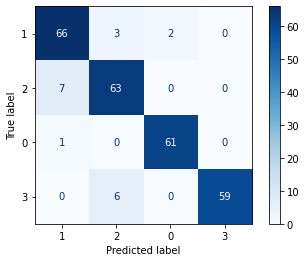

In [202]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix, accuracy_score

lda_clf = LinearDiscriminantAnalysis().fit(X_train,y_train)
print("Accuracy of the PCA-based LDA classifier = {0:.4f}".format(accuracy_score(lda_clf.predict(X_test), y_test)))
plot_confusion_matrix(lda_clf, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

Eventhough it had a good performance, it is not better than the one from SVM.

### Random Forest

One last model that was tested was Random Forest. Due to its function as a tree model that tries diverse variables into diverse subsets, it was seen as an interesting alternative.

In [203]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [204]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6529850746268657


In this case it was the least efficient of the models, having the lowest rate of result.

### IV. Prediction

After considering all the tested models, results show that the best one is the SVM considering the GridSearchCV adaptation. Hence, first the real price_range is compared with the predicted price_range from the test training set.

In [205]:
y_pred=svm_model.predict(X_test)

In [206]:
svm_test=X_test

In [207]:
svm_test["y_true"]=y_test
svm_test["y_pred"]=y_pred

In [208]:
svm_test.head(25)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,blue,dial_sim,four_g,three_g,touch_screen,wifi,y_true,y_pred
773,-1.632191,1.071030,-1.127599,0.778476,-1.807055,0.696761,-1.809962,1.424210,-0.674271,1.503103,...,-0.796012,0.268908,1.016555,0.953327,0.943391,0.560112,-1.002990,-0.992565,1,1
1088,-1.096106,-0.074242,1.798460,0.828300,0.478061,0.738244,-0.127013,0.119506,-1.057158,0.100525,...,0.289582,-0.369199,-0.983715,0.953327,-1.060006,0.560112,-1.002990,1.007491,1,1
301,-2.114480,1.328248,0.830542,0.430020,1.379060,-0.332258,-0.804443,0.085991,-2.127965,0.761059,...,-1.011945,-0.236032,1.016555,0.953327,-1.060006,-1.785357,0.997019,1.007491,1,1
383,1.754210,0.604759,-2.152496,-0.392683,0.362298,-1.001446,-1.560259,0.784705,2.527127,-0.225568,...,-0.899781,0.157404,-0.983715,0.953327,0.943391,0.560112,0.997019,-0.992565,2,2
318,0.922177,-0.656831,1.276499,0.172281,-0.521305,-2.644818,-0.069332,-1.101226,-1.161393,0.599146,...,-0.914441,0.914674,-0.983715,0.953327,-1.060006,-1.785357,0.997019,1.007491,2,1
223,0.914436,-0.887487,-1.654517,-0.613993,0.523682,0.414510,-2.866362,0.619051,-0.581194,-0.456602,...,-0.421773,0.378293,-0.983715,-1.048958,-1.060006,0.560112,0.997019,1.007491,0,0
358,-1.004254,0.799822,1.410597,-0.204122,0.600572,-0.728178,-0.089214,-0.767702,-1.212984,1.023573,...,-0.676795,0.516052,1.016555,0.953327,-1.060006,-1.785357,0.997019,1.007491,2,2
361,-0.323699,-1.547187,-0.246125,1.657609,0.468194,-1.630603,1.685686,-0.173894,0.075108,-0.239584,...,-0.851593,0.448237,-0.983715,0.953327,-1.060006,0.560112,-1.002990,1.007491,1,1
820,-1.365373,0.568075,3.558823,-1.077688,-0.697355,-0.609255,-1.152974,-0.973216,0.074574,1.142862,...,-0.316365,-0.405563,-0.983715,-1.048958,-1.060006,0.560112,-1.002990,-0.992565,1,1
591,-1.984118,-0.168689,-0.737622,-0.447267,0.633047,1.857248,-2.414590,-1.009703,1.134191,0.198085,...,-0.683438,-0.230198,-0.983715,-1.048958,0.943391,0.560112,0.997019,1.007491,0,0


As it is observable, y_true and y_pred are pretty similar, showing that it is highly accurate. Now it is the time to do the prediction with the test set. For that the necessary adaptations are made and results are recorded.

In [209]:
test_set

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1646,0,2.5,0,3,1,25,0.6,200,2,5,211,1608,686,8,6,11,1,1,0
1,1182,0,0.5,0,7,1,8,0.5,138,8,16,275,986,2563,19,17,19,1,0,0
2,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0
3,989,1,2.0,0,4,0,17,0.2,166,3,19,256,1394,3892,18,7,19,1,1,0
4,615,1,0.5,1,7,0,58,0.5,130,5,8,1021,1958,1906,14,5,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1308,0,1.3,1,8,0,46,0.9,199,1,12,275,989,488,5,3,9,0,1,0
656,504,1,2.8,1,2,0,54,0.4,163,2,10,1207,1539,2378,17,11,2,1,0,0
657,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1
658,1748,0,1.7,1,6,1,14,0.5,146,3,7,859,1234,3968,16,12,3,1,0,1


In [210]:
from sklearn.decomposition import PCA

pca_test_set = PCA()

principalComponents_test = pca_test_set.fit_transform(test_set.iloc[:,:20])

pd.DataFrame(principalComponents_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,-3.998418e-14,-7.165716e-14,-1.037392e-13,-3.208208e-14,4.607762e-15,-8.343494e-17,8.774126e-16,2.952815e-16,-6.661338e-17,-3.818494e-17,1.258253e-16,-1.372639e-16,1.364229e-16,3.549349e-17,-5.391836e-17,-2.754531e-17,-1.270028e-17,3.364312e-18,6.690776e-17,-1.152277e-17
std,1.092771e+03,5.454232e+02,4.271585e+02,2.999140e+02,3.537086e+01,1.764415e+01,6.915432e+00,5.414478e+00,5.211867e+00,3.011891e+00,2.874407e+00,2.208316e+00,7.975256e-01,5.870374e-01,5.071591e-01,5.046181e-01,4.930658e-01,4.717665e-01,2.965486e-01,2.848350e-01
min,-1.863590e+03,-9.820918e+02,-8.102046e+02,-4.479630e+02,-6.600044e+01,-3.099613e+01,-1.218283e+01,-1.003448e+01,-9.457977e+00,-7.803889e+00,-7.684056e+00,-4.716182e+00,-1.261210e+00,-8.368198e-01,-9.605259e-01,-1.028150e+00,-8.945767e-01,-1.074843e+00,-5.052889e-01,-5.473263e-01
25%,-9.446152e+02,-4.484154e+02,-3.702030e+02,-2.354495e+02,-3.032896e+01,-1.519135e+01,-5.964083e+00,-4.580904e+00,-4.380382e+00,-2.131187e+00,-2.002156e+00,-1.896377e+00,-7.876254e-01,-5.181791e-01,-4.299645e-01,-3.079381e-01,-4.457500e-01,-3.132530e-01,-2.143216e-01,-2.368698e-01
50%,5.135264e+01,-5.682489e+01,-1.208844e+01,-4.712391e+01,1.371655e+00,-1.114909e+00,1.812214e-01,2.837725e-01,-2.335453e-01,-3.308698e-01,-3.282976e-01,-1.157366e-01,-3.117509e-02,-2.319765e-01,1.681581e-02,-2.389579e-02,2.990580e-02,-3.882937e-02,-7.995803e-02,-1.582282e-02
75%,9.539060e+02,3.931910e+02,3.653546e+02,1.996855e+02,3.042924e+01,1.440806e+01,5.606328e+00,4.596321e+00,3.956577e+00,1.691350e+00,1.711348e+00,1.873329e+00,6.671560e-01,4.878221e-01,4.145674e-01,4.365850e-01,4.351435e-01,3.311228e-01,2.254633e-01,2.333651e-01
max,1.891555e+03,1.411000e+03,9.542153e+02,9.919747e+02,6.716432e+01,3.371877e+01,1.639453e+01,1.009572e+01,1.376282e+01,1.132052e+01,9.457782e+00,4.803891e+00,1.551436e+00,1.198868e+00,9.814298e-01,1.034397e+00,9.176977e-01,1.085074e+00,7.067538e-01,7.139648e-01


In [212]:
pc_test_set = pd.DataFrame(principalComponents_test, columns=test_set.iloc[:,:20].columns)

In [213]:
pc_test_set

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-1424.198088,-176.083055,370.504398,579.328873,53.093795,-6.846215,-5.808881,0.200373,-1.832538,-2.588587,-1.775419,-1.894428,1.022216,-0.592308,0.728806,0.077399,0.170073,0.400642,-0.191725,-0.015783
1,457.292599,-450.989061,-116.462488,52.791362,-4.722579,-22.833012,6.644669,-7.427386,12.979405,-0.963953,-2.397750,3.014689,-0.889627,-0.364226,0.689520,-0.112725,-0.894577,0.328325,-0.137806,-0.076018
2,-790.430951,-596.715308,660.059444,52.235178,49.479469,-17.190235,7.780091,4.405176,-5.478666,0.837087,-0.367304,3.139138,1.455361,0.153109,0.723825,0.350222,0.336750,0.343741,0.468072,-0.008117
3,1783.079472,-137.514329,-275.977895,350.777886,25.207954,-14.932395,7.362611,-7.462265,4.813272,5.707155,1.263716,-1.688182,0.540163,0.042043,0.652719,-0.510613,0.637673,-0.135123,0.601814,-0.122146
4,-219.654233,815.313041,-513.937300,239.669228,-6.389967,25.278049,0.200084,5.217294,-1.302451,-1.674858,2.555882,0.958129,-0.929160,0.378452,-0.347770,-0.855896,-0.159884,0.244634,0.552845,0.216436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,-1617.559803,-503.902956,0.503254,70.541626,53.527534,15.778342,3.195427,2.361493,-6.783370,-3.216958,-1.800056,-3.048048,-0.196986,0.838138,0.024941,0.104123,0.540069,0.877236,-0.505289,0.197304
656,252.837870,689.927968,-626.839096,-200.099387,28.867169,22.383306,-0.860272,8.293823,5.345302,1.503279,-1.192643,-2.926588,1.381539,0.503324,-0.352431,-0.778484,-0.202697,0.307588,0.595382,0.127866
657,1844.583817,51.717465,258.895042,-277.236680,-15.824017,-13.779872,-11.385066,6.072517,5.461704,-2.067517,-0.682492,0.509878,-1.100532,0.122010,0.267229,-0.040173,0.621781,-0.579184,0.367370,0.298176
658,1849.576130,81.815882,542.520389,-147.858578,7.078790,-18.450419,-2.756018,9.030846,6.923135,-3.338744,0.525534,-1.053976,0.105808,-0.252041,-0.571461,0.412937,-0.686872,0.316217,-0.158181,0.042198


In [214]:
y_pred=svm_model.predict(pc_test_set)

In [215]:
svm_test=pc_test_set

In [216]:
svm_test["y_pred"]=y_pred

In [217]:
svm_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,y_pred
0,-1424.198088,-176.083055,370.504398,579.328873,53.093795,-6.846215,-5.808881,0.200373,-1.832538,-2.588587,...,-1.894428,1.022216,-0.592308,0.728806,0.077399,0.170073,0.400642,-0.191725,-0.015783,0
1,457.292599,-450.989061,-116.462488,52.791362,-4.722579,-22.833012,6.644669,-7.427386,12.979405,-0.963953,...,3.014689,-0.889627,-0.364226,0.689520,-0.112725,-0.894577,0.328325,-0.137806,-0.076018,0
2,-790.430951,-596.715308,660.059444,52.235178,49.479469,-17.190235,7.780091,4.405176,-5.478666,0.837087,...,3.139138,1.455361,0.153109,0.723825,0.350222,0.336750,0.343741,0.468072,-0.008117,0
3,1783.079472,-137.514329,-275.977895,350.777886,25.207954,-14.932395,7.362611,-7.462265,4.813272,5.707155,...,-1.688182,0.540163,0.042043,0.652719,-0.510613,0.637673,-0.135123,0.601814,-0.122146,0
4,-219.654233,815.313041,-513.937300,239.669228,-6.389967,25.278049,0.200084,5.217294,-1.302451,-1.674858,...,0.958129,-0.929160,0.378452,-0.347770,-0.855896,-0.159884,0.244634,0.552845,0.216436,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,-1617.559803,-503.902956,0.503254,70.541626,53.527534,15.778342,3.195427,2.361493,-6.783370,-3.216958,...,-3.048048,-0.196986,0.838138,0.024941,0.104123,0.540069,0.877236,-0.505289,0.197304,0
656,252.837870,689.927968,-626.839096,-200.099387,28.867169,22.383306,-0.860272,8.293823,5.345302,1.503279,...,-2.926588,1.381539,0.503324,-0.352431,-0.778484,-0.202697,0.307588,0.595382,0.127866,3
657,1844.583817,51.717465,258.895042,-277.236680,-15.824017,-13.779872,-11.385066,6.072517,5.461704,-2.067517,...,0.509878,-1.100532,0.122010,0.267229,-0.040173,0.621781,-0.579184,0.367370,0.298176,3
658,1849.576130,81.815882,542.520389,-147.858578,7.078790,-18.450419,-2.756018,9.030846,6.923135,-3.338744,...,-1.053976,0.105808,-0.252041,-0.571461,0.412937,-0.686872,0.316217,-0.158181,0.042198,3


In [218]:
print(y_pred)

[0 0 0 0 3 0 0 0 3 3 0 0 3 3 3 0 2 0 3 3 0 3 0 3 0 3 3 3 0 3 0 0 0 0 0 0 3
 3 0 0 0 0 3 3 3 3 0 0 2 3 3 0 0 0 0 0 3 3 0 0 3 3 3 0 0 0 3 3 3 3 0 0 0 0
 3 0 0 0 0 3 0 0 0 3 0 0 0 3 0 3 3 3 0 3 3 3 3 3 0 0 0 3 3 0 0 3 3 0 0 3 0
 0 3 3 3 1 3 0 0 0 0 0 3 3 3 3 0 3 3 3 3 0 3 0 0 3 0 0 3 0 0 0 2 0 0 0 0 0
 0 0 3 0 3 0 0 0 0 0 0 0 3 0 3 3 3 3 0 3 3 3 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 3 0 3 0 3 0 3 3 2 3 0 0 3 0 0 0 3 3 3 3 3 3 0 0 0 0 3 0 3 3 0 3 0 0 3 0 3
 0 0 3 0 0 3 0 0 0 0 0 3 0 3 3 1 3 0 3 3 0 0 0 3 0 0 3 3 0 3 0 3 0 3 3 3 0
 3 3 3 0 0 2 0 3 0 3 3 3 3 0 0 0 3 0 3 0 0 3 3 0 3 3 0 0 0 0 0 0 0 3 0 1 3
 0 0 0 0 3 3 0 3 0 0 3 3 0 3 3 3 0 0 0 3 0 0 0 0 3 0 3 3 0 0 0 3 0 0 3 0 3
 3 3 3 3 0 0 0 0 3 3 0 3 0 0 0 0 3 0 3 3 3 2 0 0 0 0 3 0 0 0 3 0 2 0 0 0 0
 3 2 0 0 3 0 0 3 3 0 0 0 3 3 3 3 3 3 3 0 0 0 0 0 0 2 3 3 0 3 0 3 0 0 3 3 0
 3 0 0 3 0 0 3 3 0 0 3 3 3 0 0 0 3 0 0 0 0 0 3 3 3 3 3 3 0 0 3 0 0 3 3 0 3
 0 3 0 0 2 0 0 0 3 3 3 0 3 3 0 3 3 0 2 3 0 0 0 0 0 3 3 0 3 3 3 3 3 0 0 3 3
 0 0 1 0 0 3 0 0 3 0 0 3 

Now we have the y_pre for the test set, which next will be downloaded into a csv file for completing the prediction that is complemented by the business report.

In [219]:
svm_test.to_csv('out.csv')